FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

Objective:

Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset.

Dataset:

The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.


In [ ]:
# Force compatible versions for Colab + pmdarima
!pip install --quiet --upgrade --force-reinstall numpy==1.26.4 pandas==2.2.2 scikit-learn==1.5.1 pmdarima

# Restart runtime so new binaries load
import os, sys; os.kill(os.getpid(), 9)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/

In [1]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.8 MB/s eta 0:00:00


Part 1: Data Preparation and Exploration

1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
                                             
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.


In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
# adfuller checks if data is stationary or non-stationary (Augmented Dickey-Fuller (ADF) test)

In [4]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA function for model building

In [5]:
from pmdarima import auto_arima
# from auto_arima we will get order of p,d,q

In [6]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [7]:
df = pd.read_csv('/content/exchange_rate.csv')
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df.set_index('date', inplace=True)

In [8]:
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


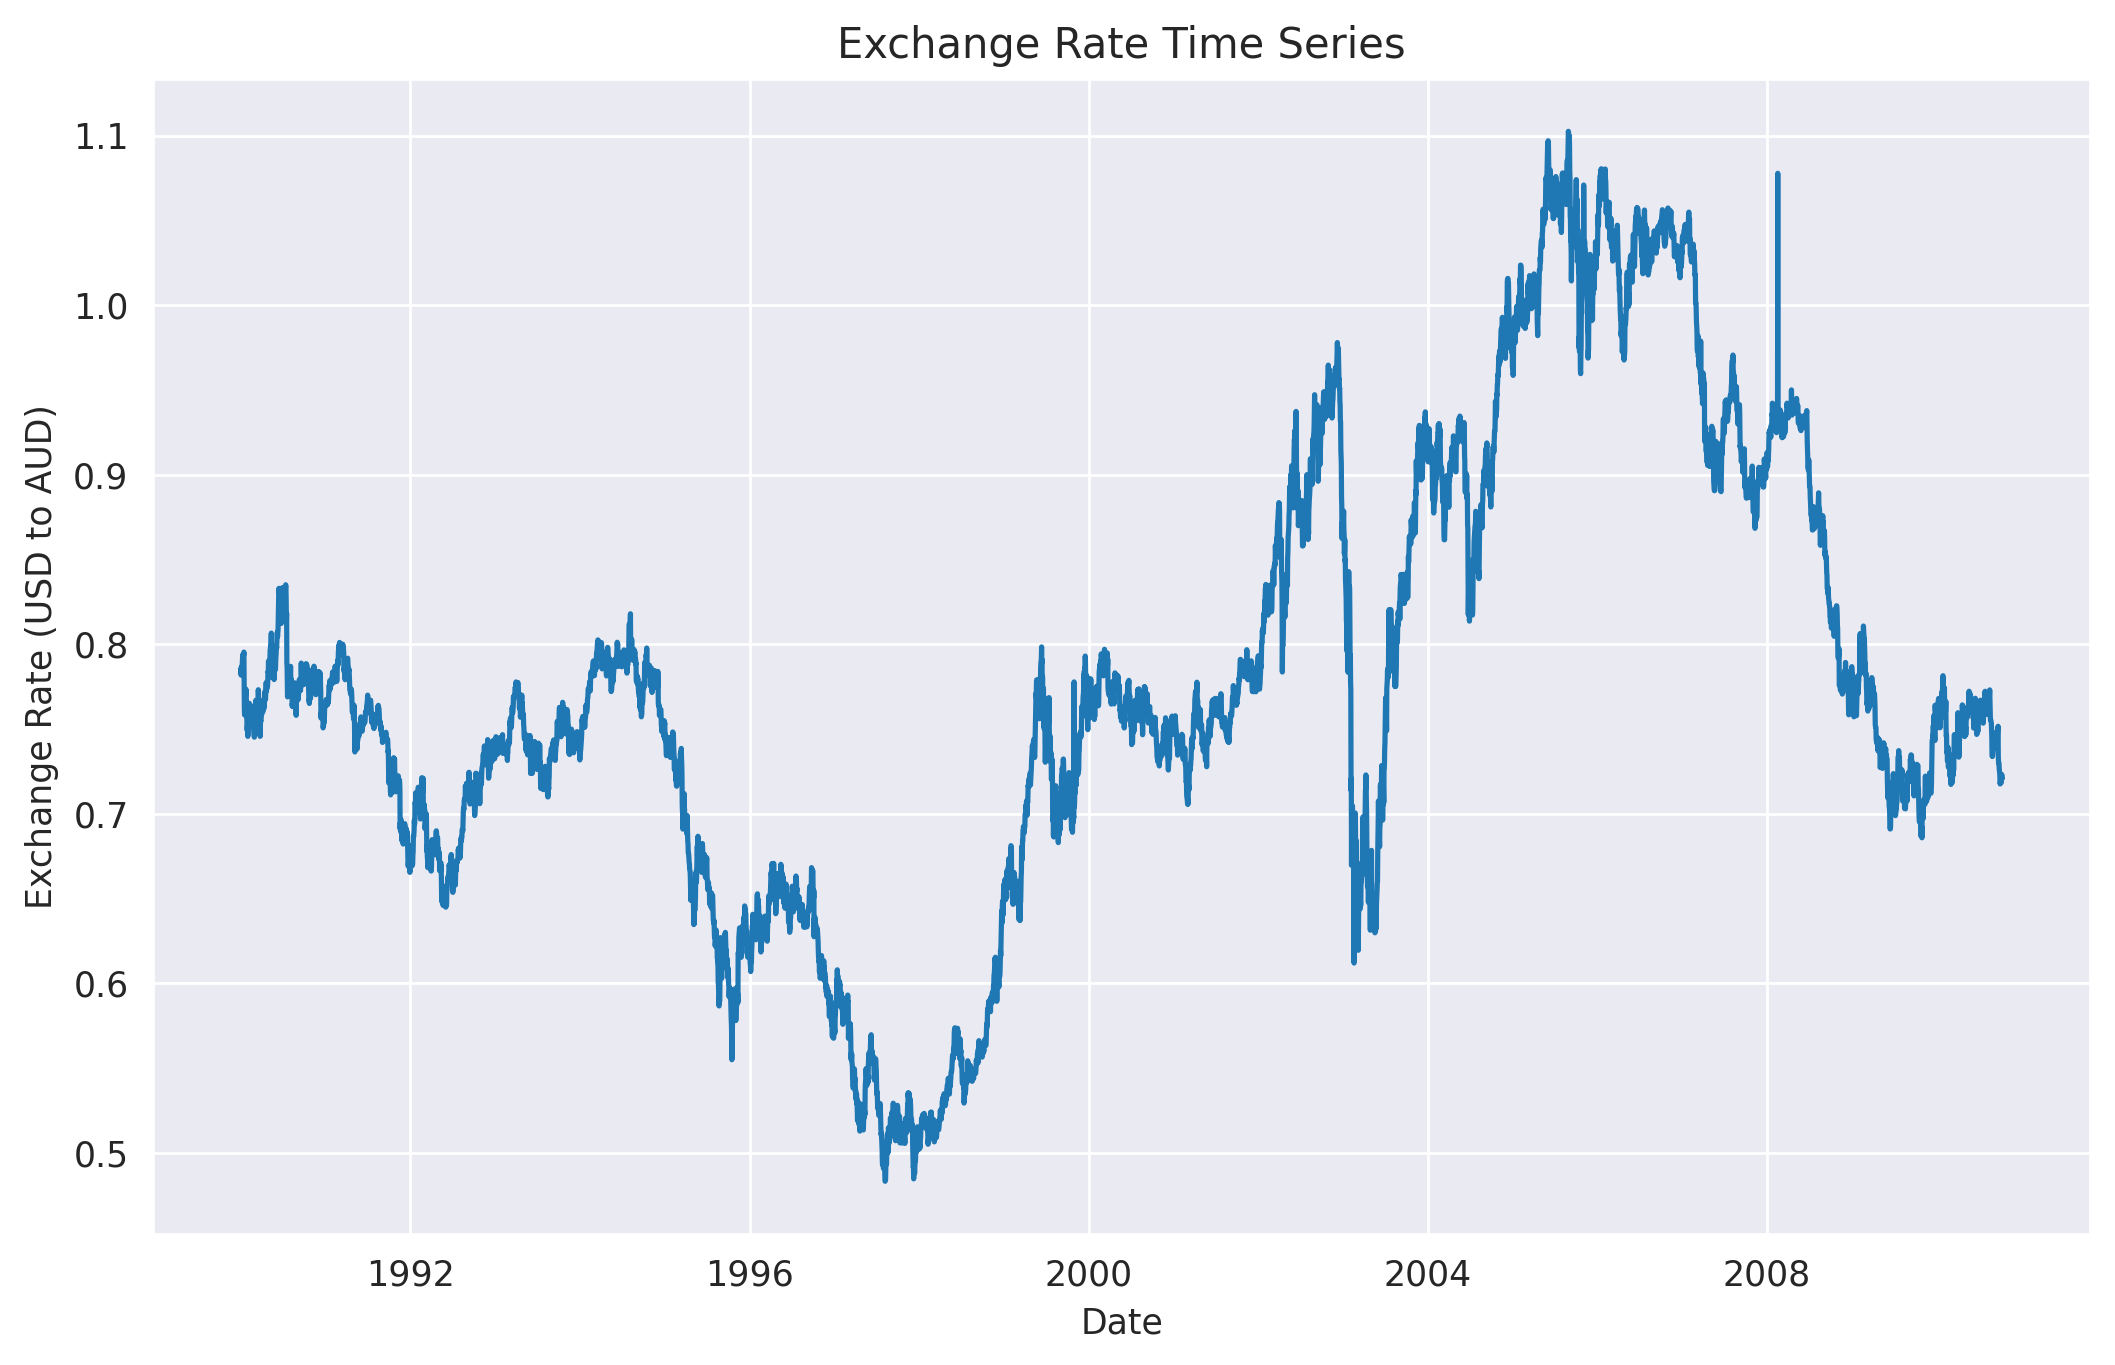

In [9]:
# Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'])
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.show()

In [10]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display missing values
missing_values

,0
Ex_rate,0


Part 2: Model Building - ARIMA

1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

2. Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

3. Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

4. Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error


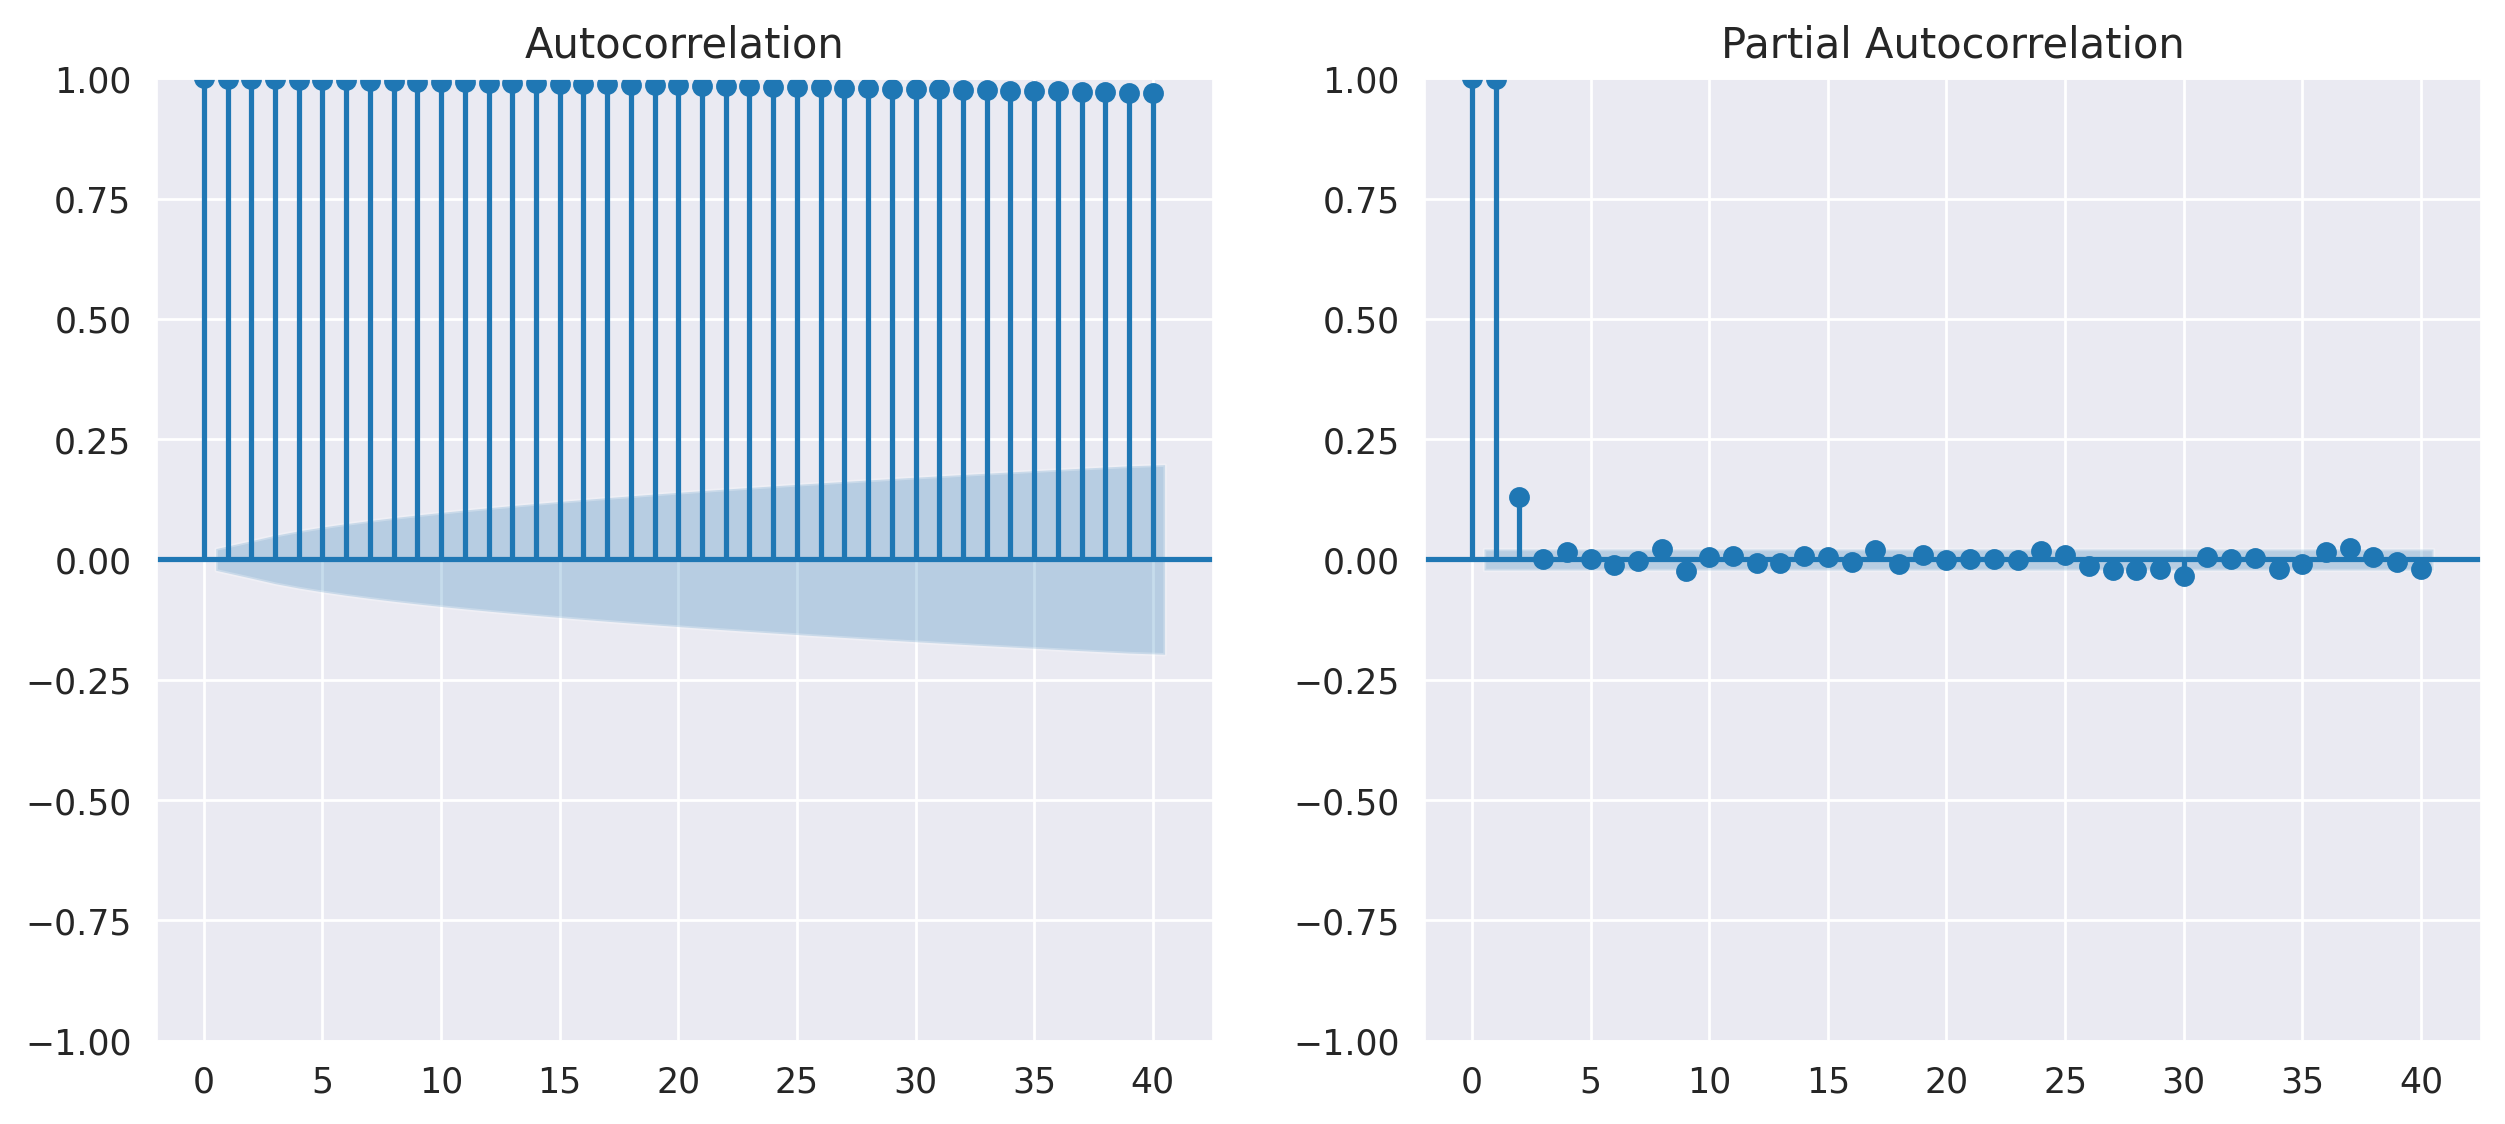

In [12]:
# ACF and PACF plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(df['Ex_rate'], lags=40, ax=plt.gca())
plt.subplot(1, 2, 2)
plot_pacf(df['Ex_rate'], lags=40, ax=plt.gca())
plt.show()

In [13]:
adfuller(df['Ex_rate'])[1]

0.4492327353597477

In [14]:
# Arima model Building

In [15]:
order = auto_arima(df['Ex_rate'])

In [16]:
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [17]:
# split data
train=df.iloc[:-30]
test=df.iloc[-30:]

In [18]:
model = ARIMA(train['Ex_rate'], order=(1, 1, 0)).fit()

In [19]:
ypred=model.predict(start=7558,end=7587)
ypred

,predicted_mean
2010-09-11,0.744095
2010-09-12,0.744155
2010-09-13,0.744147
2010-09-14,0.744148
2010-09-15,0.744148
2010-09-16,0.744148
2010-09-17,0.744148
2010-09-18,0.744148
2010-09-19,0.744148
2010-09-20,0.744148


In [20]:
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))

0.0166346976048715


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 0)   Log Likelihood               28054.159
Date:                Tue, 23 Sep 2025   AIC                         -56104.319
Time:                        11:20:33   BIC                         -56090.450
Sample:                    01-01-1990   HQIC                        -56099.559
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

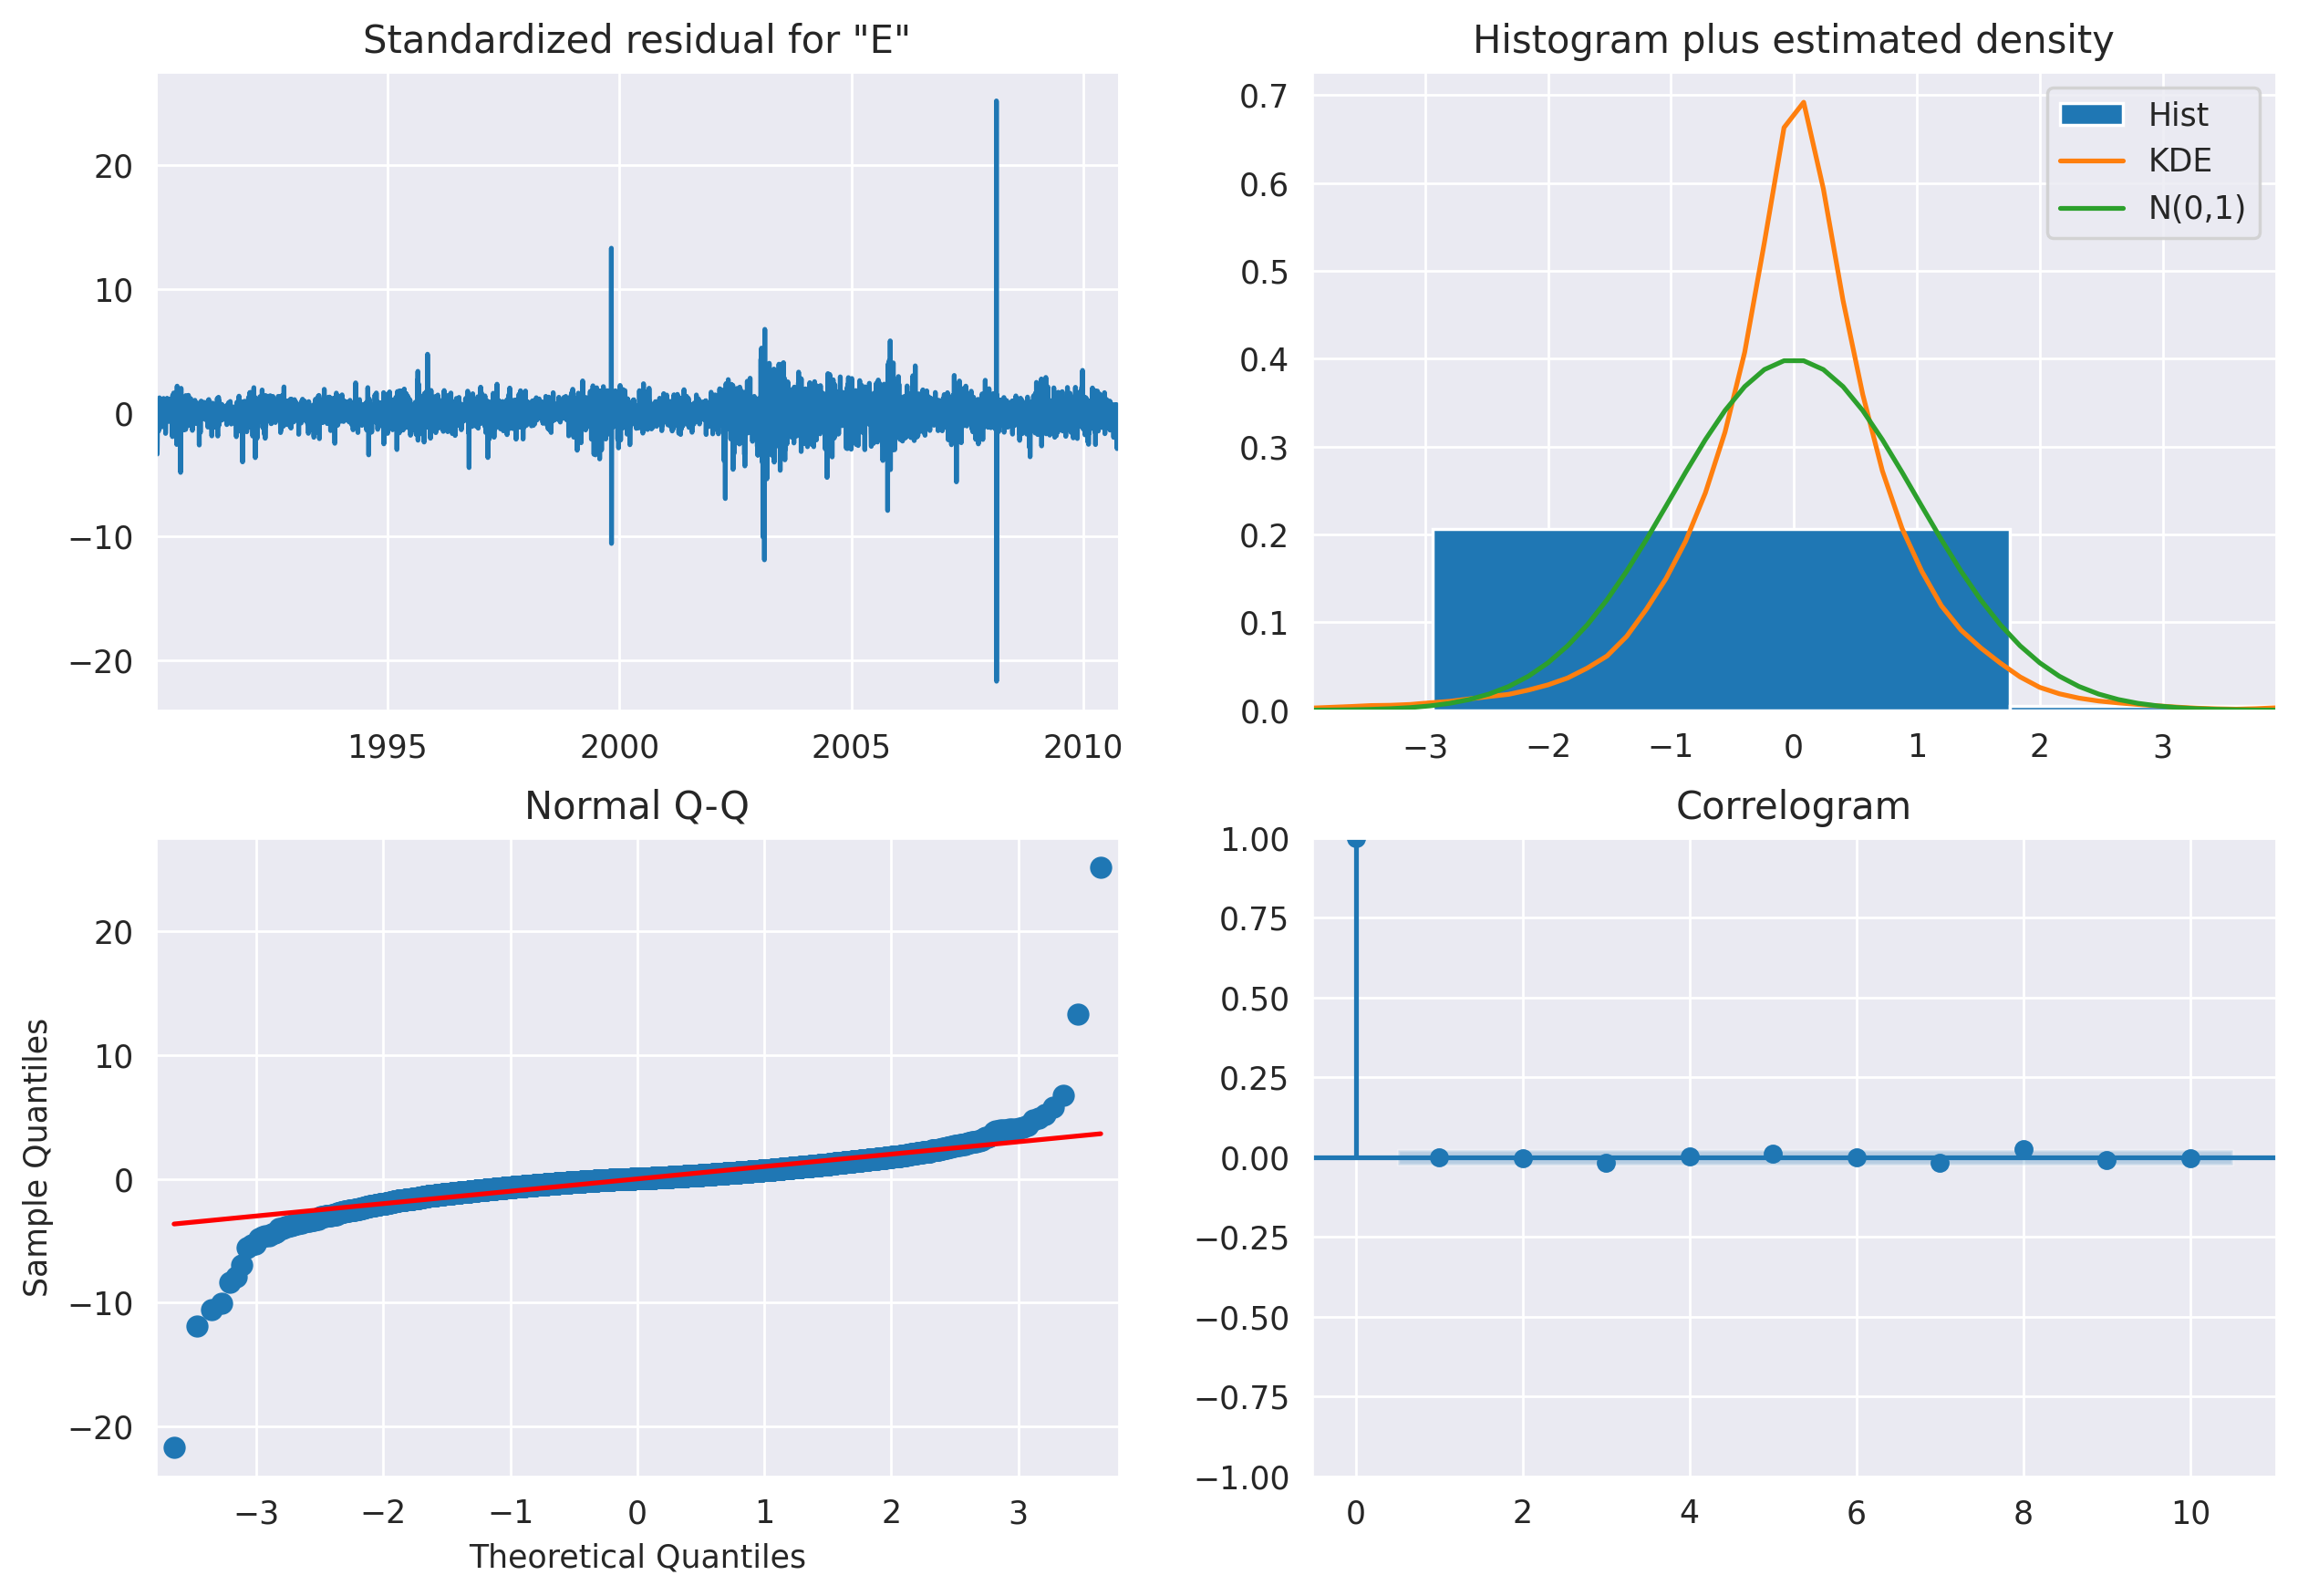

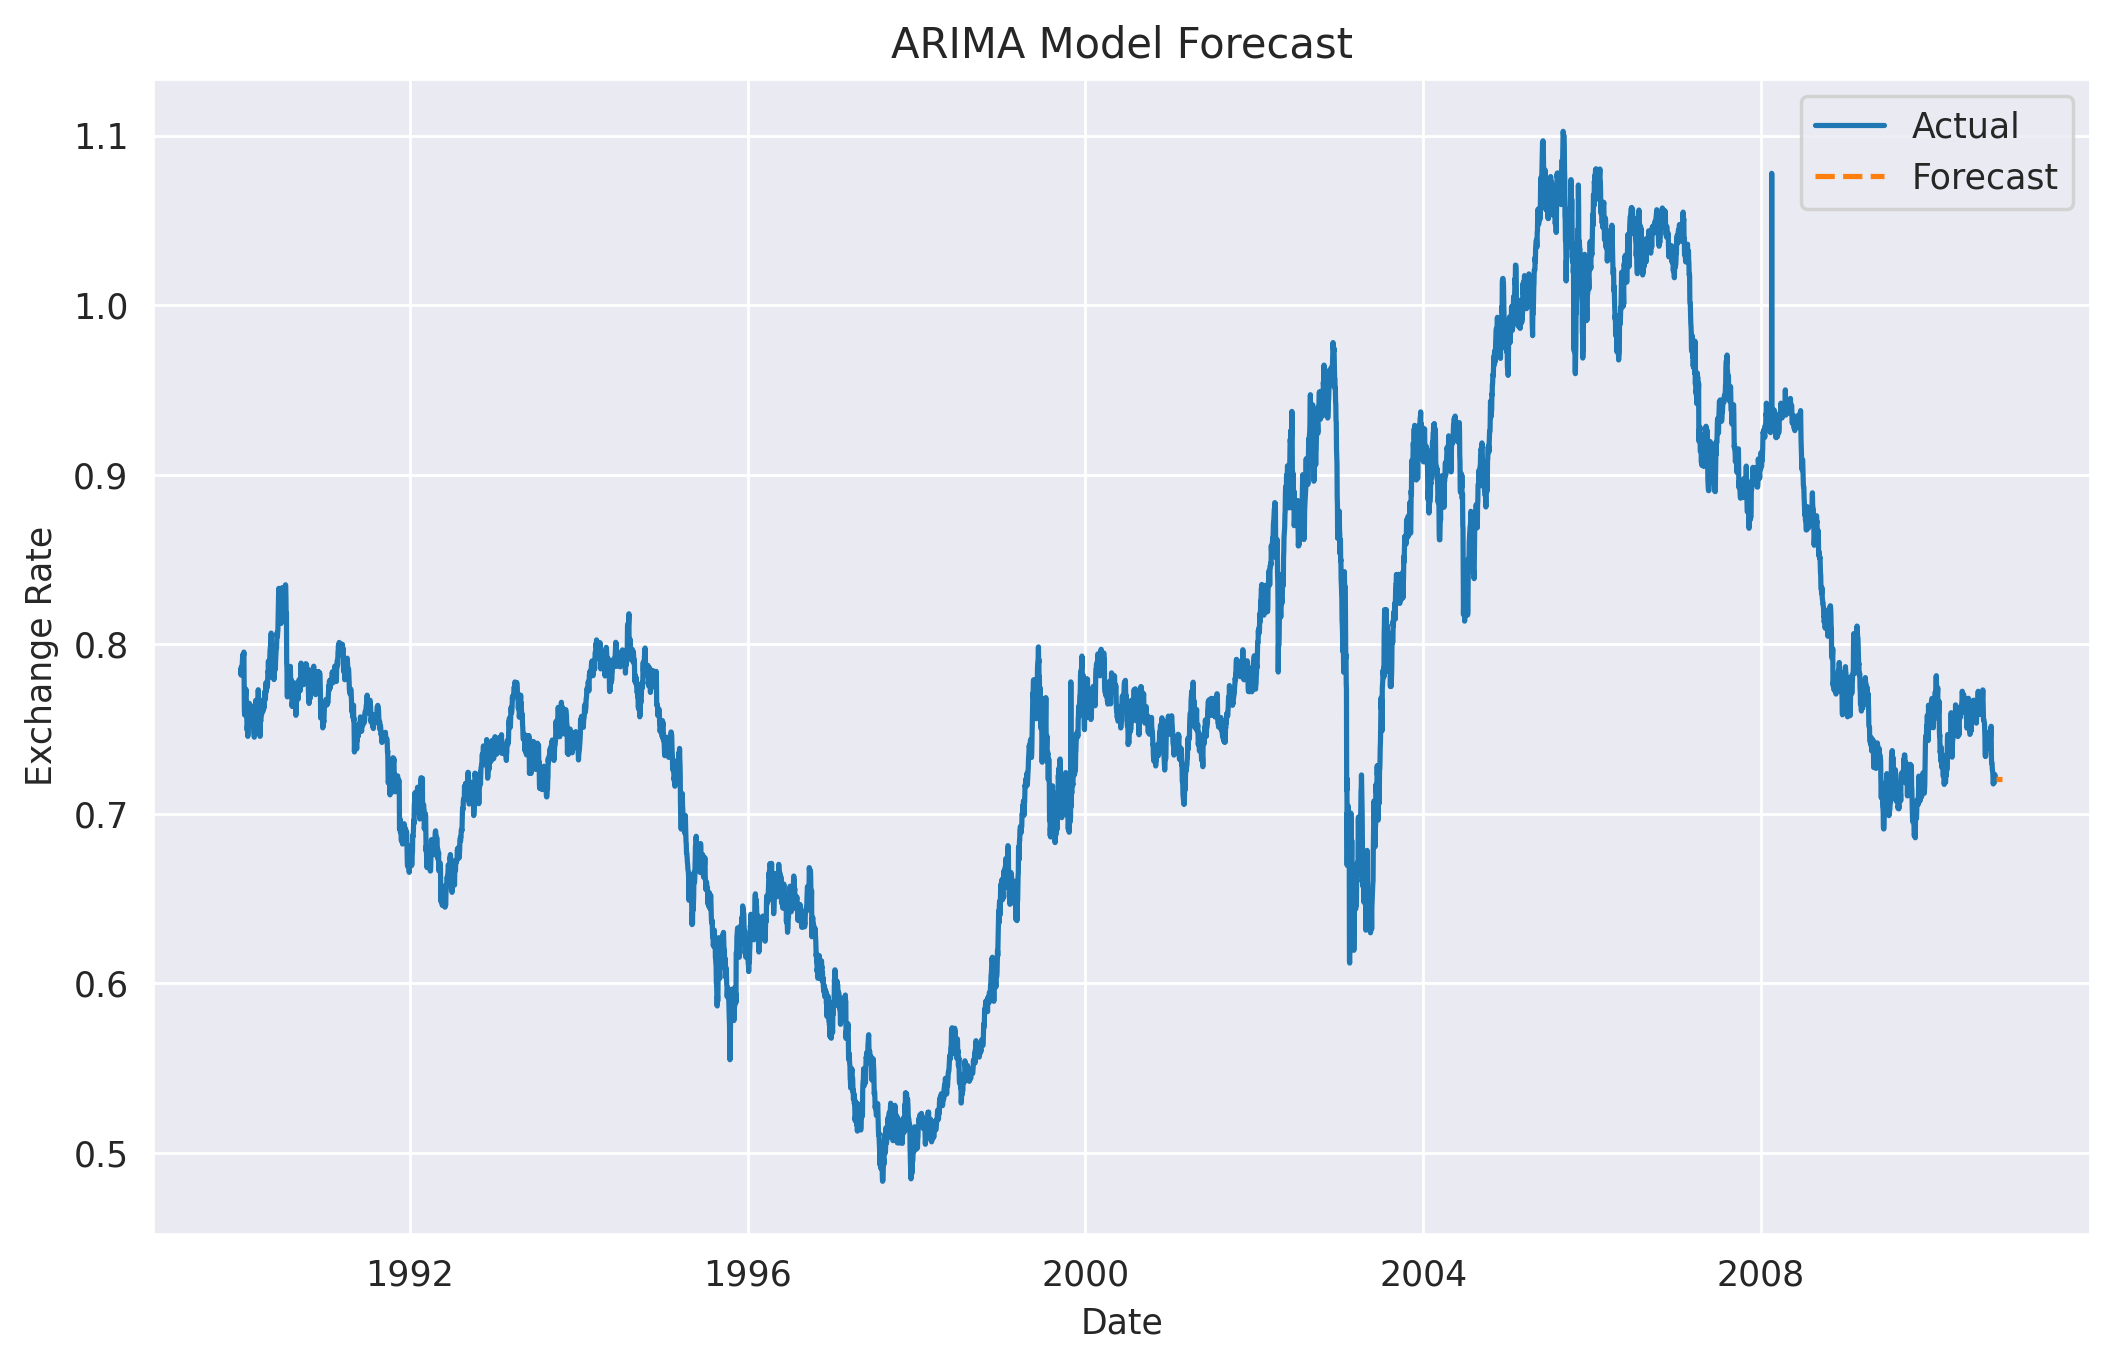

MAE: 0.012724599999999968, RMSE: 0.016983602872574836


In [21]:
p=1
d=1
q=0

model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = model.fit()

# Print model summary
print(arima_result.summary())

# Diagnostics
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

# Forecasting
forecast_steps = 30  # Adjust based on desired forecast horizon
forecast = arima_result.forecast(steps=forecast_steps)

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Calculate error metrics
y_true = df['Ex_rate'].iloc[-forecast_steps:]
y_pred = forecast[:len(y_true)]
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'MAE: {mae}, RMSE: {rmse}')


Part 3: Model Building - Exponential Smoothing

1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.274
Optimized:                         True   AIC                         -77578.773
Trend:                         Additive   BIC                         -77467.824
Seasonal:                      Additive   AICC                        -77578.683
Seasonal Periods:                    12   Date:                 Tue, 23 Sep 2025
Box-Cox:                          False   Time:                         11:22:00
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8975580                alpha                 True
smoothing_trend          

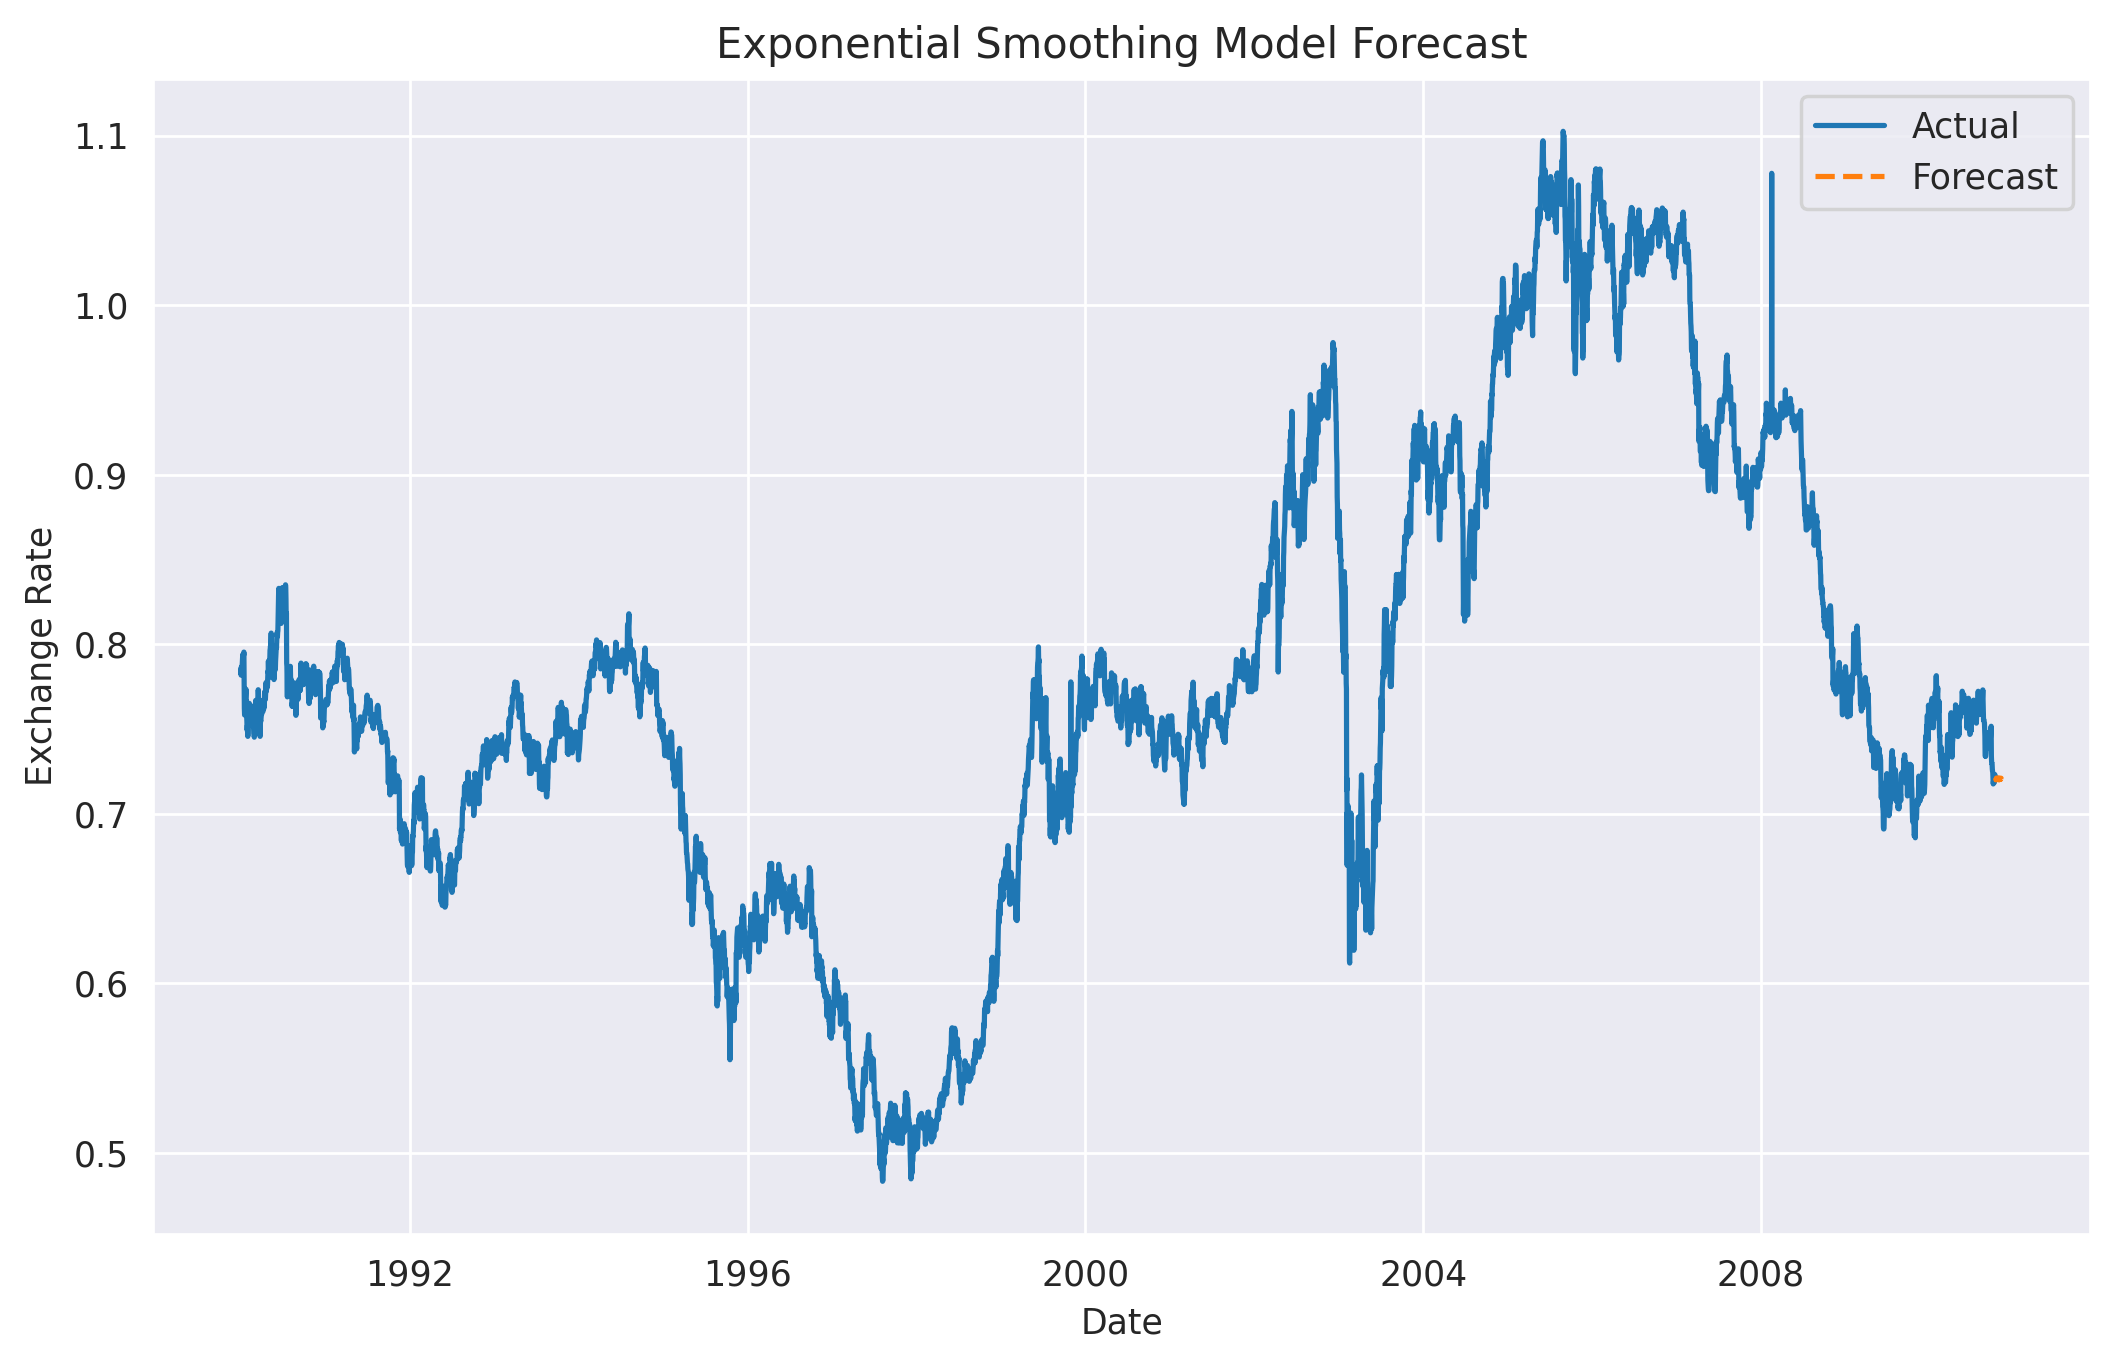

MAE: 0.012927542802878111, RMSE: 0.017160690719169685


In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Exponential Smoothing model
# Choose a model type based on your data characteristics
model = ExponentialSmoothing(
    df['Ex_rate'],
    trend='add',   # or 'mul' for multiplicative trend
    seasonal='add',  # or 'mul' for multiplicative seasonality
    seasonal_periods=12  # Adjust based on your data
)

exp_result = model.fit()

# Print model summary
print(exp_result.summary())

# Forecasting
exp_forecast = exp_result.forecast(steps=forecast_steps)

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(exp_forecast.index, exp_forecast, label='Forecast', linestyle='--')
plt.title('Exponential Smoothing Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Calculate error metrics
y_true_exp = df['Ex_rate'].iloc[-forecast_steps:]
y_pred_exp = exp_forecast[:len(y_true_exp)]
mae_exp = mean_absolute_error(y_true_exp, y_pred_exp)
rmse_exp = np.sqrt(mean_squared_error(y_true_exp, y_pred_exp))
print(f'MAE: {mae_exp}, RMSE: {rmse_exp}')

Part 4: Evaluation and Comparison

1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.


In [23]:
# Display error metrics for comparison
print(f'ARIMA Model - MAE: {mae}, RMSE: {rmse}')
print(f'Exponential Smoothing Model - MAE: {mae_exp}, RMSE: {rmse_exp}')

ARIMA Model - MAE: 0.012724599999999968, RMSE: 0.016983602872574836
Exponential Smoothing Model - MAE: 0.012927542802878111, RMSE: 0.017160690719169685
